In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load calendar data
listings = pd.read_csv('listings.csv.gz', compression='gzip')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49751833,https://www.airbnb.com/rooms/49751833,20230309202154,2023-03-10,previous scrape,The Old No. 77 Hotel,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,267642269,...,4.65,4.80,4.45,NaN,f,1,0,0,0,10.48
1,54052921,https://www.airbnb.com/rooms/54052921,20230309202154,2023-03-10,previous scrape,Sweet Spot,You’ll love the stylish decor of this charming...,"We are less than a mile from the freeway, two ...",https://a0.muscache.com/pictures/589261d6-375e...,227505133,...,5.00,5.00,5.00,NaN,f,5,3,2,0,0.22
2,611584572696788093,https://www.airbnb.com/rooms/611584572696788093,20230309202154,2023-03-09,city scrape,"Stunning Centrally Located Home, 10 min to Bou...",Our home is 2.7 miles from the Superdome/Smoot...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,244418201,...,4.92,4.21,4.71,"20-RSTR-20469, 22-OSTR-14193",f,2,2,0,0,2.35
3,806067969324909110,https://www.airbnb.com/rooms/806067969324909110,20230309202154,2023-03-09,city scrape,Napoleon House,Currently being renovated but almost finished....,NaN,https://a0.muscache.com/pictures/2209112e-ad8b...,4423079,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,35649853,https://www.airbnb.com/rooms/35649853,20230309202154,2023-03-10,previous scrape,Upstairs 2 Bedroom and 1 Bath next to Tulane U...,NaN,NaN,https://a0.muscache.com/pictures/082e9760-94d9...,127726714,...,5.00,5.00,5.00,NaN,t,2,2,0,0,0.02


In [4]:
listings_subset = listings[['availability_365', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 
                            'bedrooms', 'beds', 'price', 'number_of_reviews_ltm', 'minimum_nights', 'maximum_nights',
                            'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                            'review_scores_communication', 'review_scores_location']]

In [5]:
listings_subset.head()

,availability_365,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,number_of_reviews_ltm,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,0,Room in hotel,Hotel room,0,NaN,NaN,NaN,$0.00,29,1,365,4.51,4.55,4.55,4.69,4.65,4.80
1,0,Private room in bed and breakfast,Private room,1,1 shared bath,1.0,1.0,$42.00,2,30,365,5.00,5.00,4.50,5.00,5.00,5.00
2,159,Entire home,Entire home/apt,10,2 baths,3.0,3.0,$263.00,24,2,1125,4.83,4.83,4.88,4.88,4.92,4.21
3,365,Entire home,Entire home/apt,6,2 baths,3.0,5.0,$255.00,0,30,365,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,$100.00,0,30,1125,5.00,5.00,5.00,5.00,5.00,5.00


In [6]:
listings_subset.isnull().sum() / len(listings_subset)

availability_365               0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bathrooms_text                 0.001842
bedrooms                       0.044218
beds                           0.008503
price                          0.000000
number_of_reviews_ltm          0.000000
minimum_nights                 0.000000
maximum_nights                 0.000000
review_scores_rating           0.124291
review_scores_accuracy         0.126134
review_scores_cleanliness      0.125850
review_scores_checkin          0.125992
review_scores_communication    0.125850
review_scores_location         0.125992
dtype: float64

In [7]:
listings_subset['bathrooms_text'] = listings_subset['bathrooms_text'].fillna('Missing')

<ipython-input-7-a677a68fcc5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['bathrooms_text'] = listings_subset['bathrooms_text'].fillna('Missing')


In [8]:
#replacing unique values in property_type column that appear less than 100 times
listings_subset['property_type'] = np.where(listings_subset['property_type'].isin(['Entire home', 'Entire rental unit', 'Entire condo', 'Private room in home',
                                                                                   'Entire guest suite', 'Entire townhouse', 'Entire guesthouse', 'Room in boutique hotel',
                                                                                   'Room in hotel', 'Private room in bed and breakfast', 'Missing']), listings_subset['property_type'], 'Other')

<ipython-input-8-ec5551d9dd3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['property_type'] = np.where(listings_subset['property_type'].isin(['Entire home', 'Entire rental unit', 'Entire condo', 'Private room in home',


In [9]:
#replacing unique values in bathroom text column that appear less than 100 times
listings_subset['bathrooms_text'] = np.where(listings_subset['bathrooms_text'].isin(['1 bath', '2 baths', '1 private bath', '2.5 baths',
                                                                                     '1.5 baths', '3 baths', '1 shared bath', '3.5 baths',
                                                                                     '4 baths']), listings_subset['bathrooms_text'], 'Other')

<ipython-input-9-aaeac2261bd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['bathrooms_text'] = np.where(listings_subset['bathrooms_text'].isin(['1 bath', '2 baths', '1 private bath', '2.5 baths',


In [10]:
listings_subset['price'] = listings_subset['price'].str.replace('$', '')
listings_subset['price'] = listings_subset['price'].str.replace(',', '')
listings_subset['price'] = listings_subset['price'].astype(float)

<ipython-input-10-e39c2ff226e3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_subset['price'] = listings_subset['price'].str.replace('$', '')
<ipython-input-10-e39c2ff226e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['price'] = listings_subset['price'].str.replace('$', '')
<ipython-input-10-e39c2ff226e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

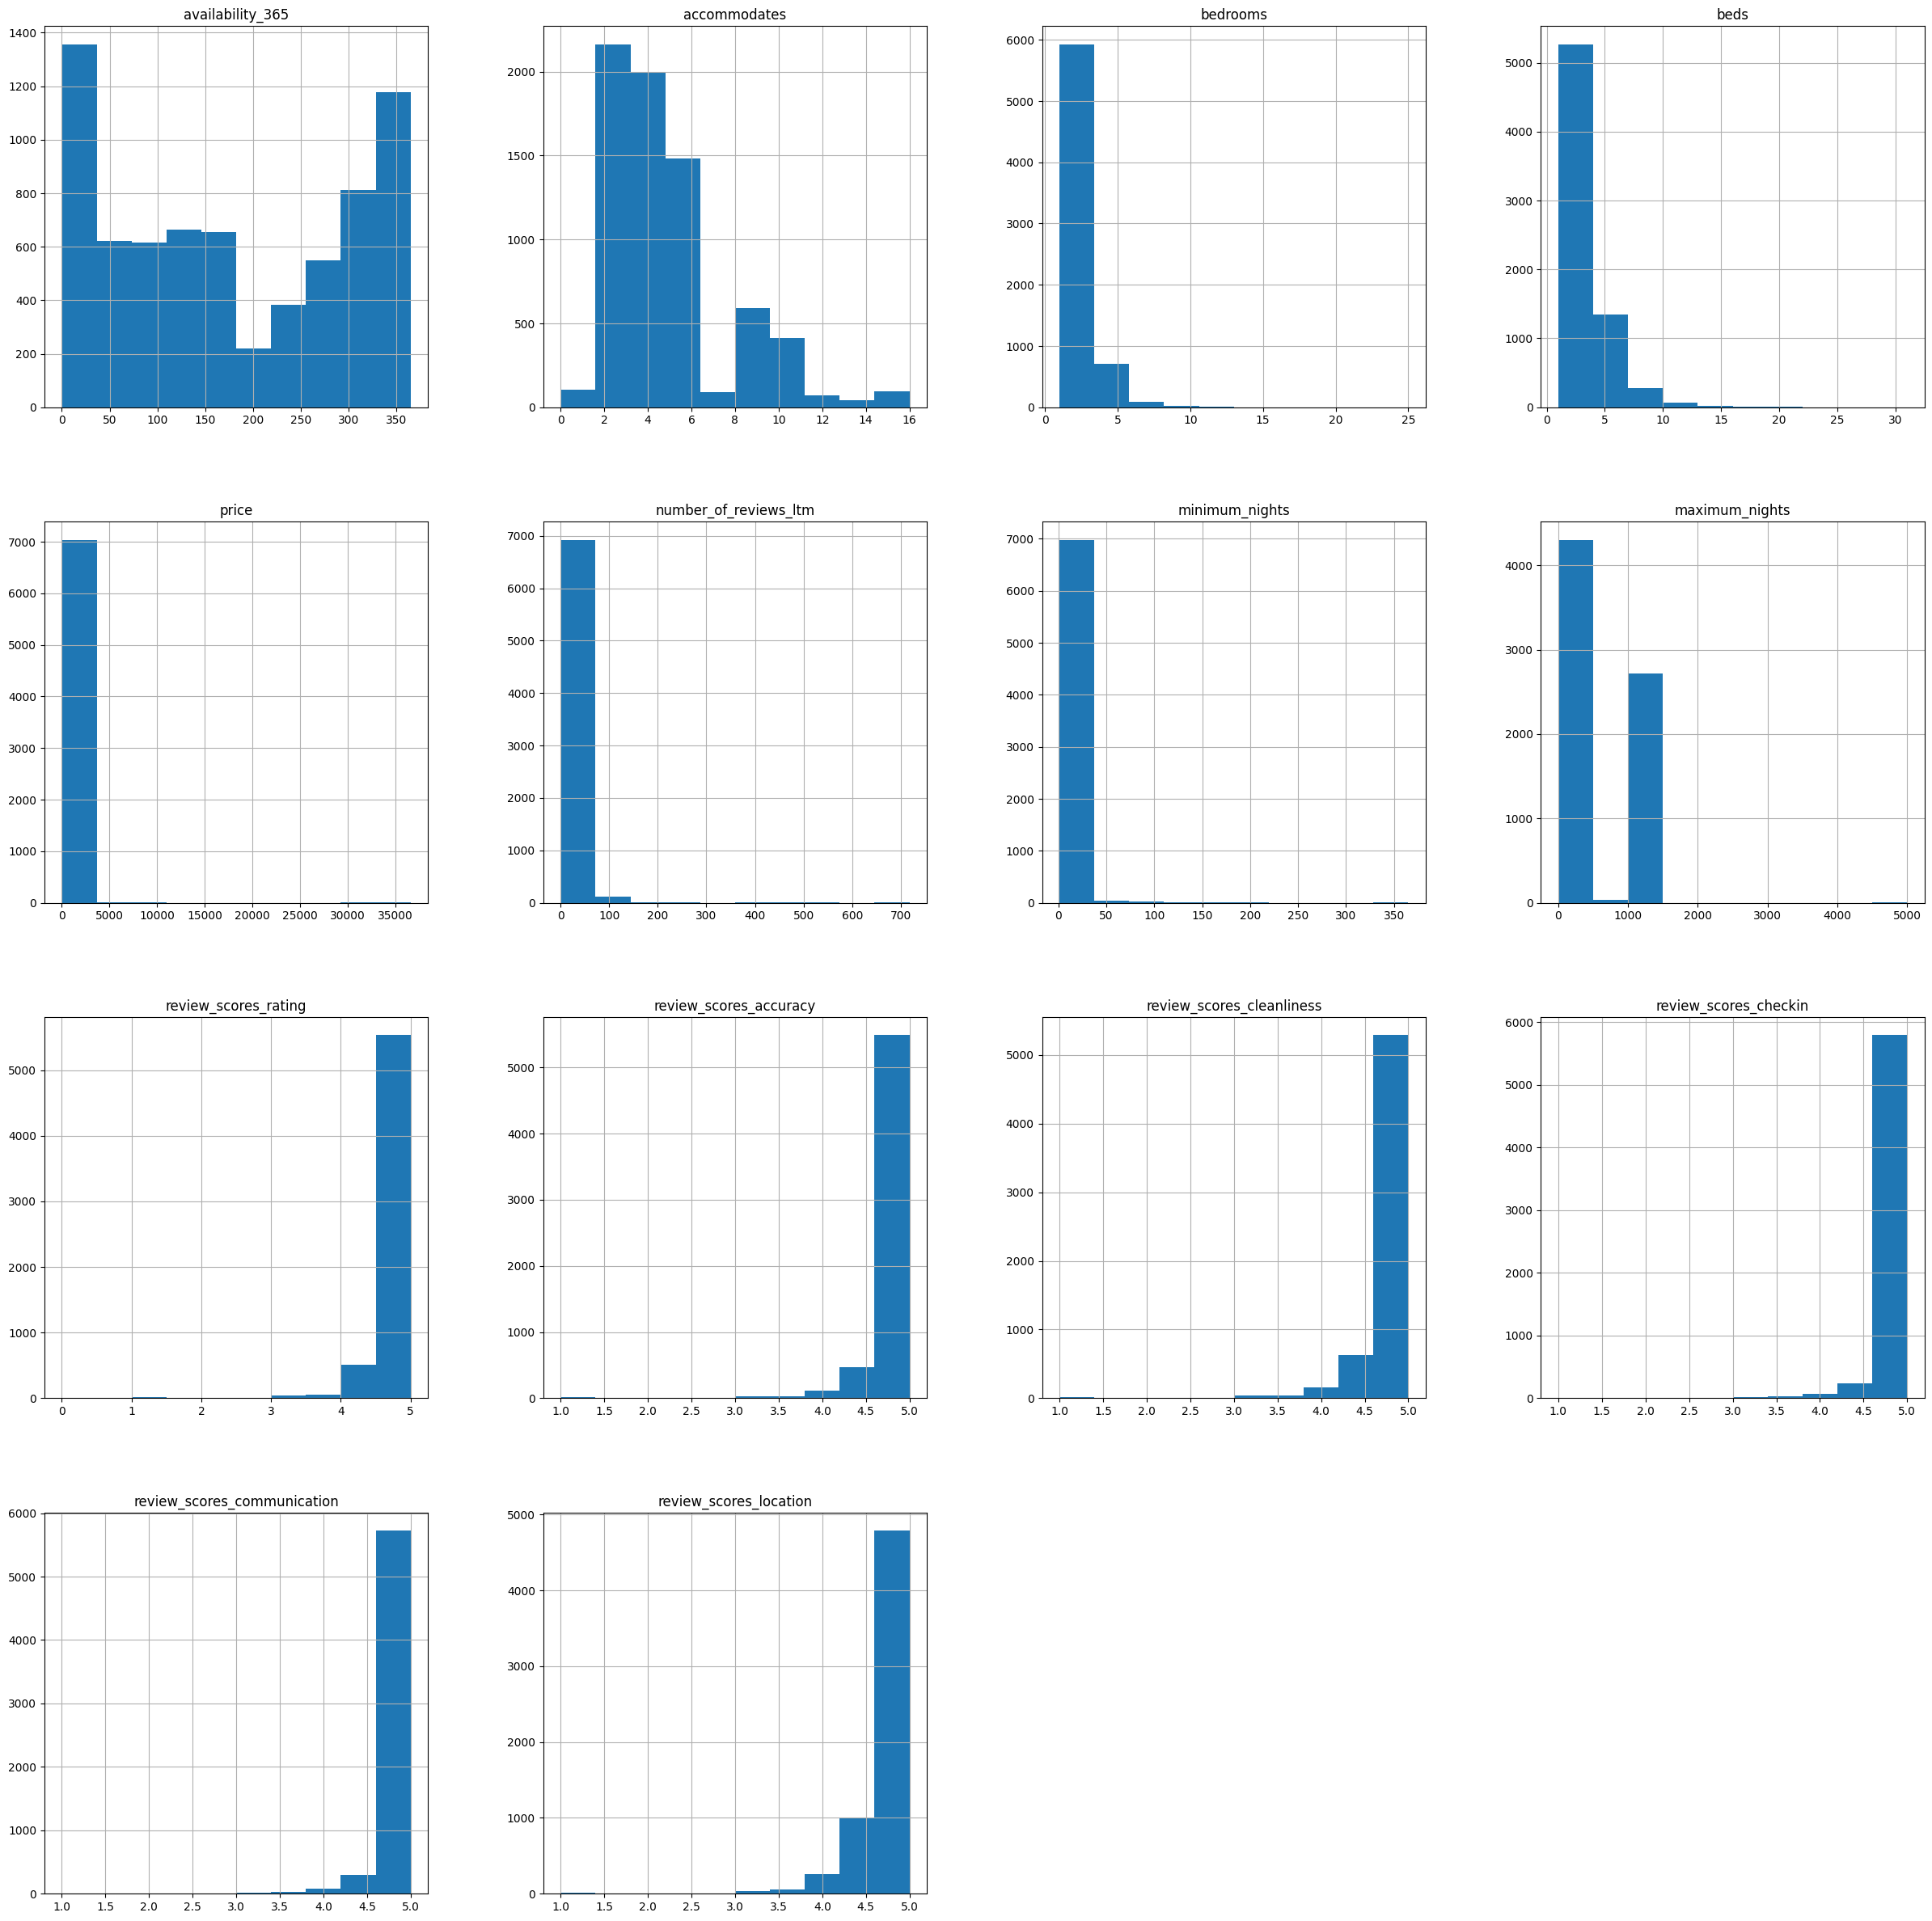

In [11]:
#EDA on continous variables

%matplotlib inline
ax = listings_subset.hist(figsize = (30, 30))
plt.show()

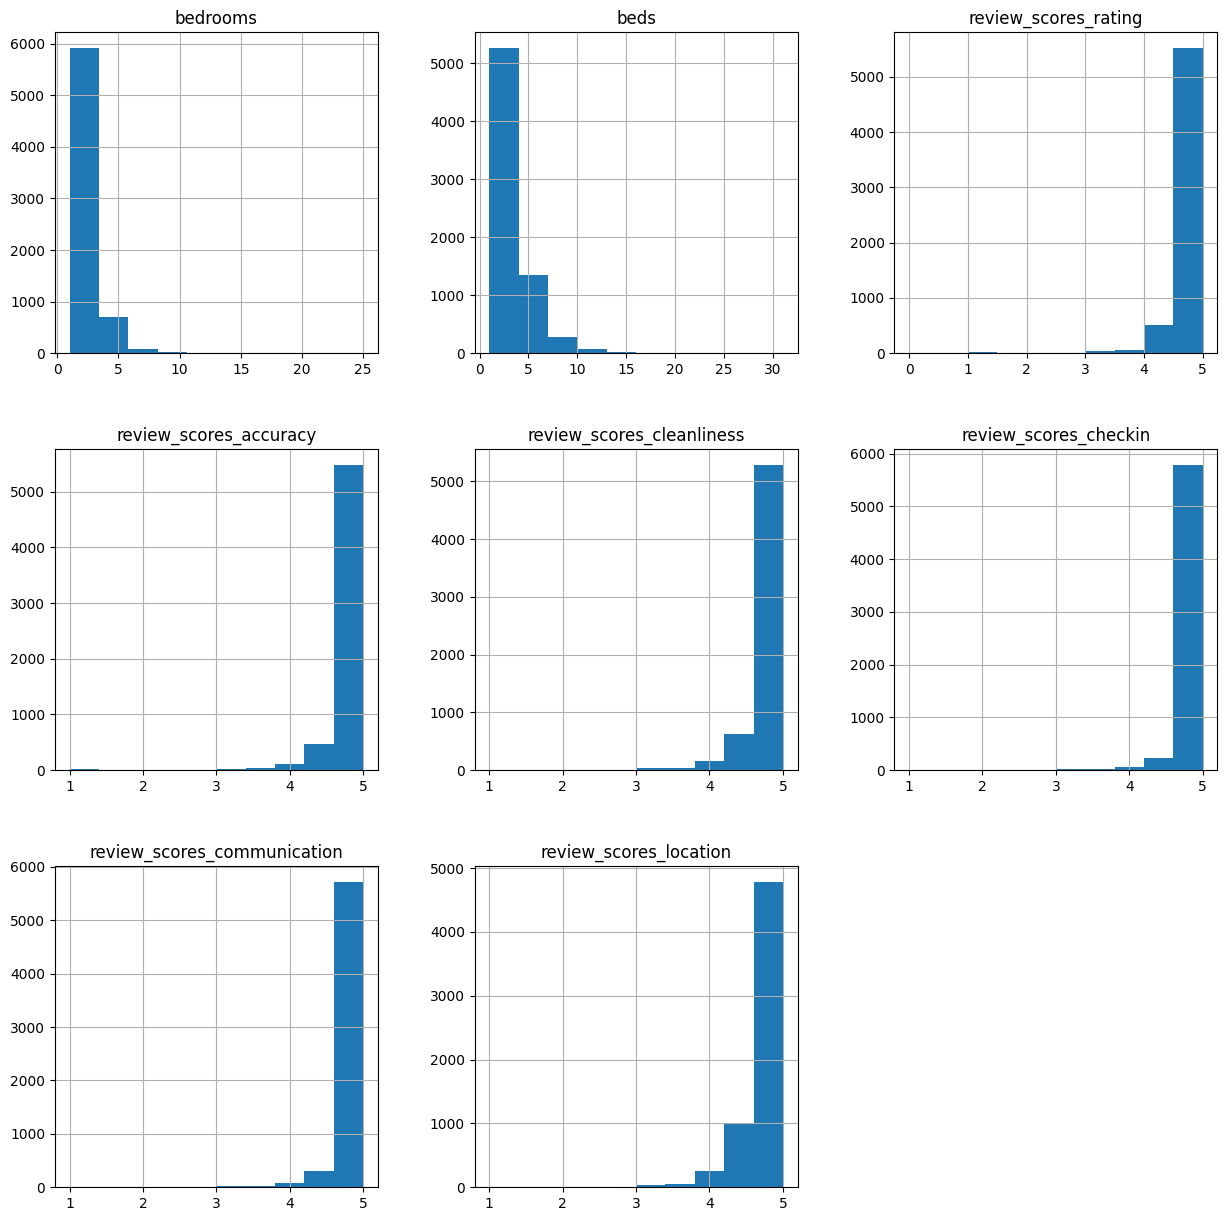

In [12]:
#EDA on continous variables that had missing values

%matplotlib inline
ax = listings_subset[['bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy',
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location']].hist(figsize = (15, 15))
plt.show()

In [13]:
#median impute all numerical columns with missing values since they all have a skewed distribution
listings_subset['bedrooms'] = listings_subset['bedrooms'].fillna(listings_subset['bedrooms'].median())
listings_subset['beds'] = listings_subset['beds'].fillna(listings_subset['beds'].median())
listings_subset['review_scores_rating'] = listings_subset['review_scores_rating'].fillna(listings_subset['review_scores_rating'].median())
listings_subset['review_scores_accuracy'] = listings_subset['review_scores_accuracy'].fillna(listings_subset['review_scores_accuracy'].median())
listings_subset['review_scores_cleanliness'] = listings_subset['review_scores_cleanliness'].fillna(listings_subset['review_scores_cleanliness'].median())
listings_subset['review_scores_checkin'] = listings_subset['review_scores_checkin'].fillna(listings_subset['review_scores_checkin'].median())
listings_subset['review_scores_communication'] = listings_subset['review_scores_communication'].fillna(listings_subset['review_scores_communication'].median())
listings_subset['review_scores_location'] = listings_subset['review_scores_location'].fillna(listings_subset['review_scores_location'].median())

<ipython-input-13-8b61f37e76ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['bedrooms'] = listings_subset['bedrooms'].fillna(listings_subset['bedrooms'].median())
<ipython-input-13-8b61f37e76ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['beds'] = listings_subset['beds'].fillna(listings_subset['beds'].median())
<ipython-input-13-8b61f37e76ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [14]:
listings_subset['successful'] = np.where(listings_subset['availability_365'] > 180, 1, 0)

listings_subset = listings_subset.drop('availability_365', axis=1)

<ipython-input-14-a86498d200f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['successful'] = np.where(listings_subset['availability_365'] > 180, 1, 0)


In [15]:
listings_subset.head()

,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,number_of_reviews_ltm,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,successful
0,Room in hotel,Hotel room,0,Other,2.0,2.0,0.0,29,1,365,4.51,4.55,4.55,4.69,4.65,4.80,0
1,Private room in bed and breakfast,Private room,1,1 shared bath,1.0,1.0,42.0,2,30,365,5.00,5.00,4.50,5.00,5.00,5.00,0
2,Entire home,Entire home/apt,10,2 baths,3.0,3.0,263.0,24,2,1125,4.83,4.83,4.88,4.88,4.92,4.21,0
3,Entire home,Entire home/apt,6,2 baths,3.0,5.0,255.0,0,30,365,4.87,4.91,4.88,4.96,4.95,4.84,1
4,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,100.0,0,30,1125,5.00,5.00,5.00,5.00,5.00,5.00,0


In [16]:
cat_cols = ['property_type', 'room_type', 'bathrooms_text']
num_cols = ['accommodates', 'maximum_nights', 'minimum_nights',
       'bedrooms', 'beds', 'price',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location']

y = listings_subset['successful']

In [17]:
dummy_data = pd.get_dummies(listings_subset[cat_cols], drop_first = True)

In [18]:
X = pd.concat([listings_subset[num_cols], dummy_data], axis=1)
X.head()

,accommodates,maximum_nights,minimum_nights,bedrooms,beds,price,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,room_type_Shared room,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_2 baths,bathrooms_text_2.5 baths,bathrooms_text_3 baths,bathrooms_text_3.5 baths,bathrooms_text_4 baths,bathrooms_text_Other
0,0,365,1,2.0,2.0,0.0,29,4.51,4.55,4.55,...,0,0,0,0,0,0,0,0,0,1
1,1,365,30,1.0,1.0,42.0,2,5.00,5.00,4.50,...,0,0,1,0,0,0,0,0,0,0
2,10,1125,2,3.0,3.0,263.0,24,4.83,4.83,4.88,...,0,0,0,0,1,0,0,0,0,0
3,6,365,30,3.0,5.0,255.0,0,4.87,4.91,4.88,...,0,0,0,0,1,0,0,0,0,0
4,4,1125,30,2.0,2.0,100.0,0,5.00,5.00,5.00,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X['price'] = X['price'].astype(float)

In [20]:
X.dtypes

accommodates                                         int64
maximum_nights                                       int64
minimum_nights                                       int64
bedrooms                                           float64
beds                                               float64
price                                              float64
number_of_reviews_ltm                                int64
review_scores_rating                               float64
review_scores_accuracy                             float64
review_scores_cleanliness                          float64
review_scores_checkin                              float64
review_scores_communication                        float64
review_scores_location                             float64
property_type_Entire guest suite                     uint8
property_type_Entire guesthouse                      uint8
property_type_Entire home                            uint8
property_type_Entire rental unit                     uin

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
#statsmodels shows p values, coefficients, etc. much better than the sklearn logistic regression
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.644728
         Iterations 6


In [23]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:             successful   No. Observations:                 4939
Model:                          Logit   Df Residuals:                     4904
Method:                           MLE   Df Model:                           34
Date:                Tue, 09 May 2023   Pseudo R-squ.:                 0.06084
Time:                        00:06:54   Log-Likelihood:                -3184.3
converged:                       True   LL-Null:                       -3390.6
Covariance Type:            nonrobust   LLR p-value:                 1.424e-66
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
accommodates                                       -0.0015      0.025     -0.062      0.950      -0.050       0.047
maximum_nights      

In [24]:
listings_subset['bathrooms_text'].value_counts()

1 bath            3305
2 baths           1628
1 private bath     447
2.5 baths          333
1.5 baths          307
3 baths            289
1 shared bath      264
Other              221
3.5 baths          137
4 baths            125
Name: bathrooms_text, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_val)

lr_pred = list(map(round, y_pred))
confusion_matrix(y_val, lr_pred)

array([[900, 252],
       [604, 361]])

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt 

lr_auc = roc_auc_score(y_val, y_pred)
print('Logistic: ROC AUC = %.3f' % (lr_auc))

Logistic: ROC AUC = 0.608


Text(0, 0.5, 'True positive rate')

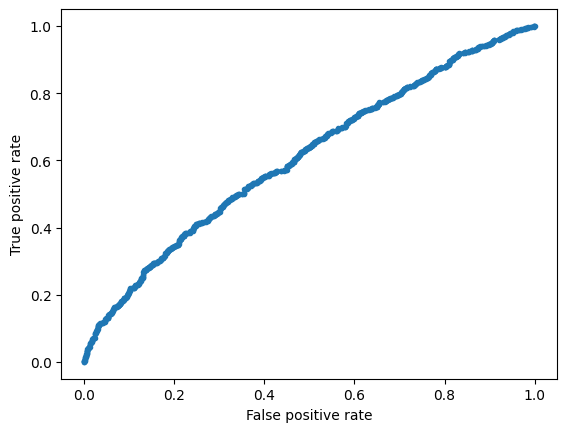

In [27]:
lr_fpr, lr_tpr, _ = roc_curve(y_val, y_pred)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [28]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [29]:
from sklearn import metrics

In [30]:
lr_acc = accuracy_score(y_val, lr_pred)
lr_prec = precision_score(y_val, lr_pred)
lr_rec = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)


print('The accuracy for our logistic regression model is {}'.format(lr_acc))
print('The precision for our logistic regression model is {}'.format(lr_prec))
print('The recall for our logistic regression model is {}'.format(lr_rec))
print('The f1 score for our logistic regression model is {}'.format(lr_f1))
print('The AUC for our logistic regression model is {}'.format(lr_auc))

The accuracy for our logistic regression model is 0.5956542276806802
The precision for our logistic regression model is 0.5889070146818923
The recall for our logistic regression model is 0.37409326424870465
The f1 score for our logistic regression model is 0.45754119138149557
The AUC for our logistic regression model is 0.6080486291018998


In [31]:
from sklearn import tree
from sklearn.tree import export_text

dtree = tree.DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X_train, y_train)

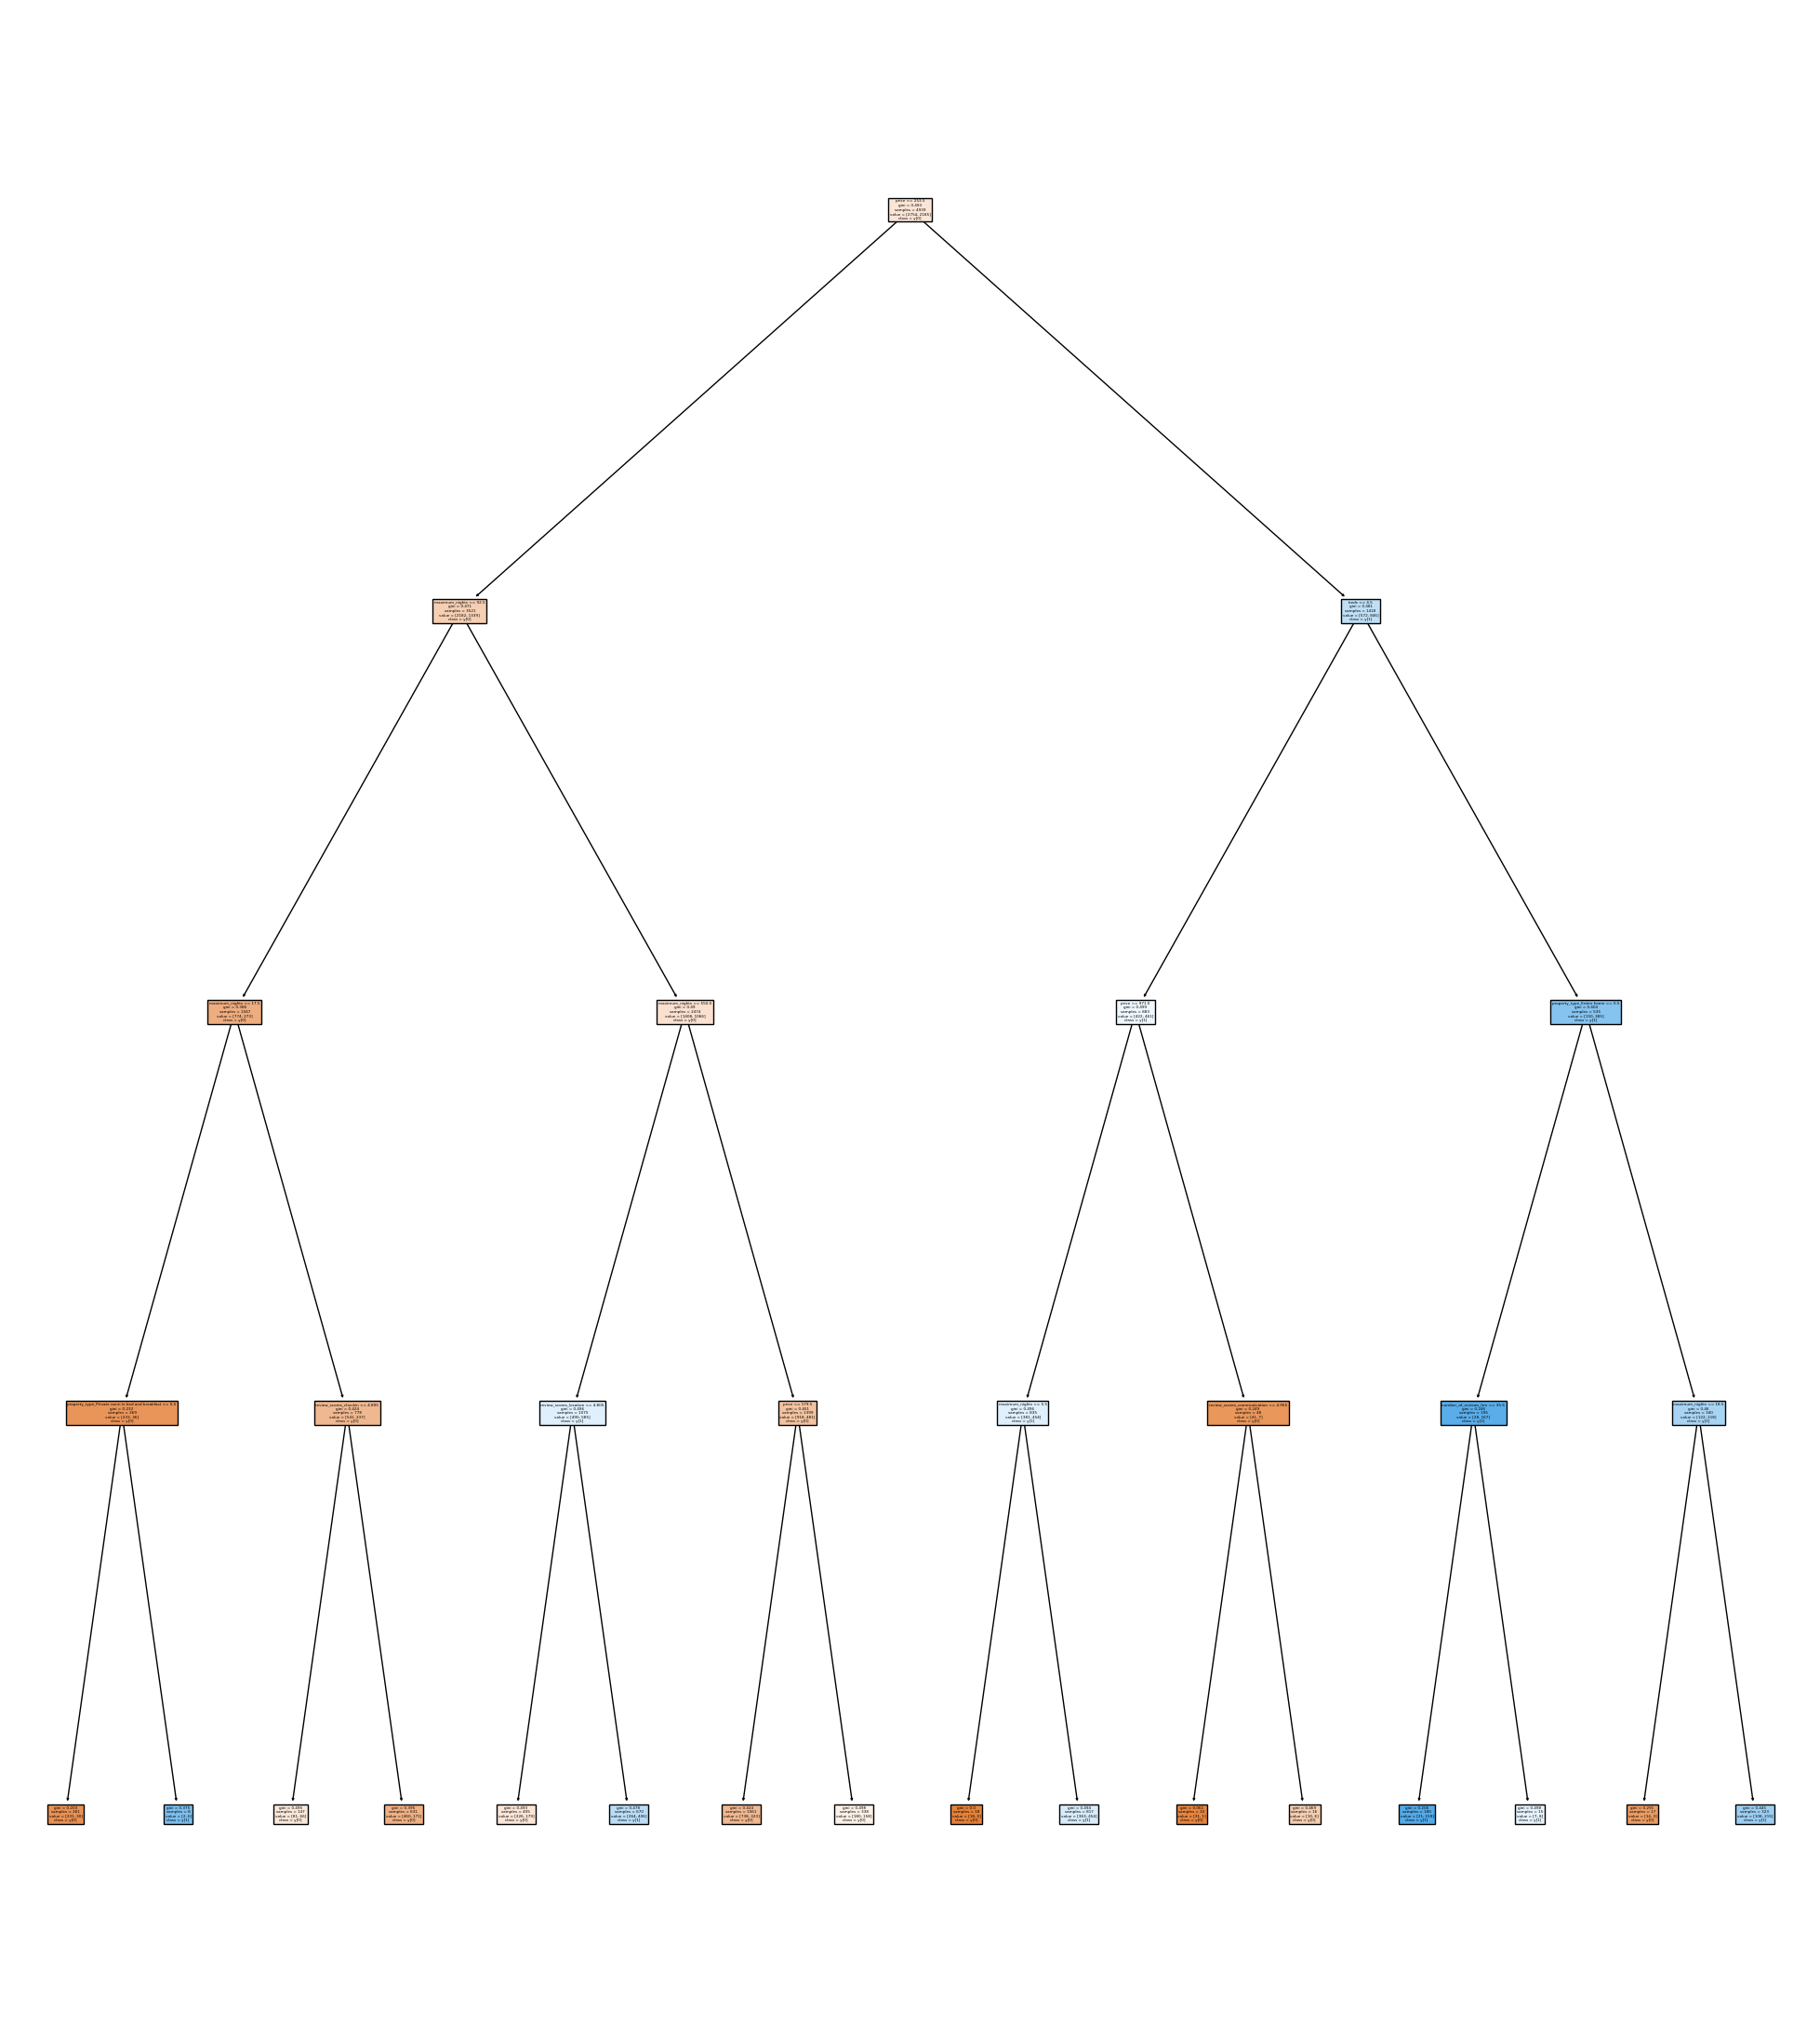

In [32]:
plt.figure(figsize=[25,28])

tree.plot_tree(dtree, feature_names=list(X_train.columns.values), class_names = True, filled = True)

plt.show()

In [33]:
dt_pred = dtree.predict(X_val)
confusion_matrix(y_val, dt_pred)

array([[802, 350],
       [447, 518]])

In [34]:
tree_auc = roc_auc_score(y_val, dt_pred)
print('Decision Tree: ROC AUC=%.3f' % (tree_auc))

Decision Tree: ROC AUC=0.616


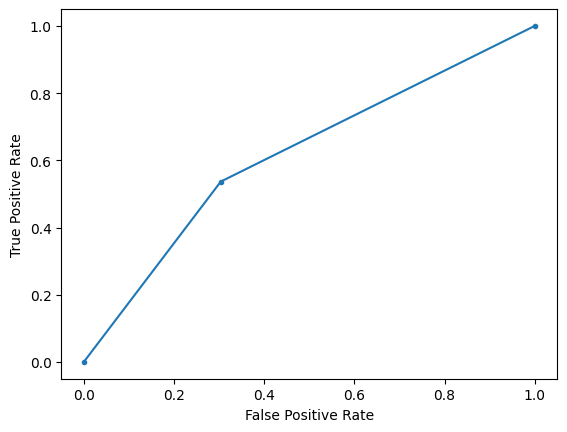

In [35]:
tree_fpr, tree_tpr, _ = roc_curve(y_val, dt_pred)
plt.plot(tree_fpr, tree_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [36]:
dt_acc = accuracy_score(y_val, dt_pred)
dt_prec = precision_score(y_val, dt_pred)
dt_rec = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)


print('The accuracy for our logistic regression model is {}'.format(dt_acc))
print('The precision for our logistic regression model is {}'.format(dt_prec))
print('The recall for our logistic regression model is {}'.format(dt_rec))
print('The f1 score for our logistic regression model is {}'.format(dt_f1))
print('The AUC for our logistic regression model is {}'.format(tree_auc))

The accuracy for our logistic regression model is 0.6235238545111006
The precision for our logistic regression model is 0.5967741935483871
The recall for our logistic regression model is 0.5367875647668394
The f1 score for our logistic regression model is 0.5651936715766503
The AUC for our logistic regression model is 0.6164840601611976


In [37]:
import xgboost as xgb
from xgboost import XGBClassifier

xgbc = XGBClassifier(max_depth=4)

In [38]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
xgbc_pred = xgbc.predict(X_val)

In [40]:
xgbc_auc = roc_auc_score(y_val, xgbc_pred)
print('XGBoost Classifier: ROC AUC=%.3f' % (xgbc_auc))

XGBoost Classifier: ROC AUC=0.680


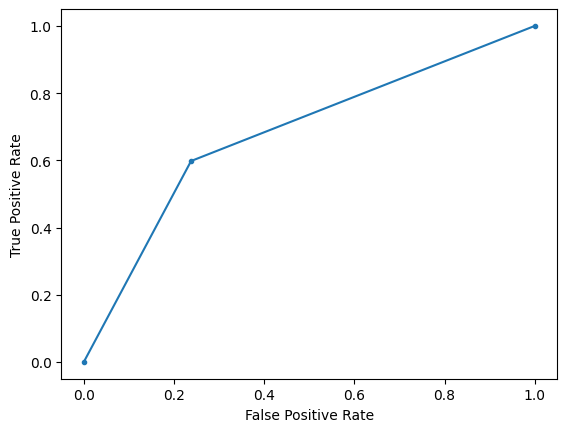

In [41]:
tree_fpr, tree_tpr, _ = roc_curve(y_val, xgbc_pred)
plt.plot(tree_fpr, tree_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
xgbc_acc = accuracy_score(y_val, xgbc_pred)
xgbc_prec = precision_score(y_val, xgbc_pred)
xgbc_rec = recall_score(y_val, xgbc_pred)
xgbc_f1 = f1_score(y_val, xgbc_pred)


print('The accuracy for our logistic regression model is {}'.format(xgbc_acc))
print('The precision for our logistic regression model is {}'.format(xgbc_prec))
print('The recall for our logistic regression model is {}'.format(xgbc_rec))
print('The f1 score for our logistic regression model is {}'.format(xgbc_f1))
print('The AUC for our logistic regression model is {}'.format(xgbc_auc))

The accuracy for our logistic regression model is 0.687293339631554
The precision for our logistic regression model is 0.6780258519388954
The recall for our logistic regression model is 0.5979274611398964
The f1 score for our logistic regression model is 0.6354625550660793
The AUC for our logistic regression model is 0.6800401194588371


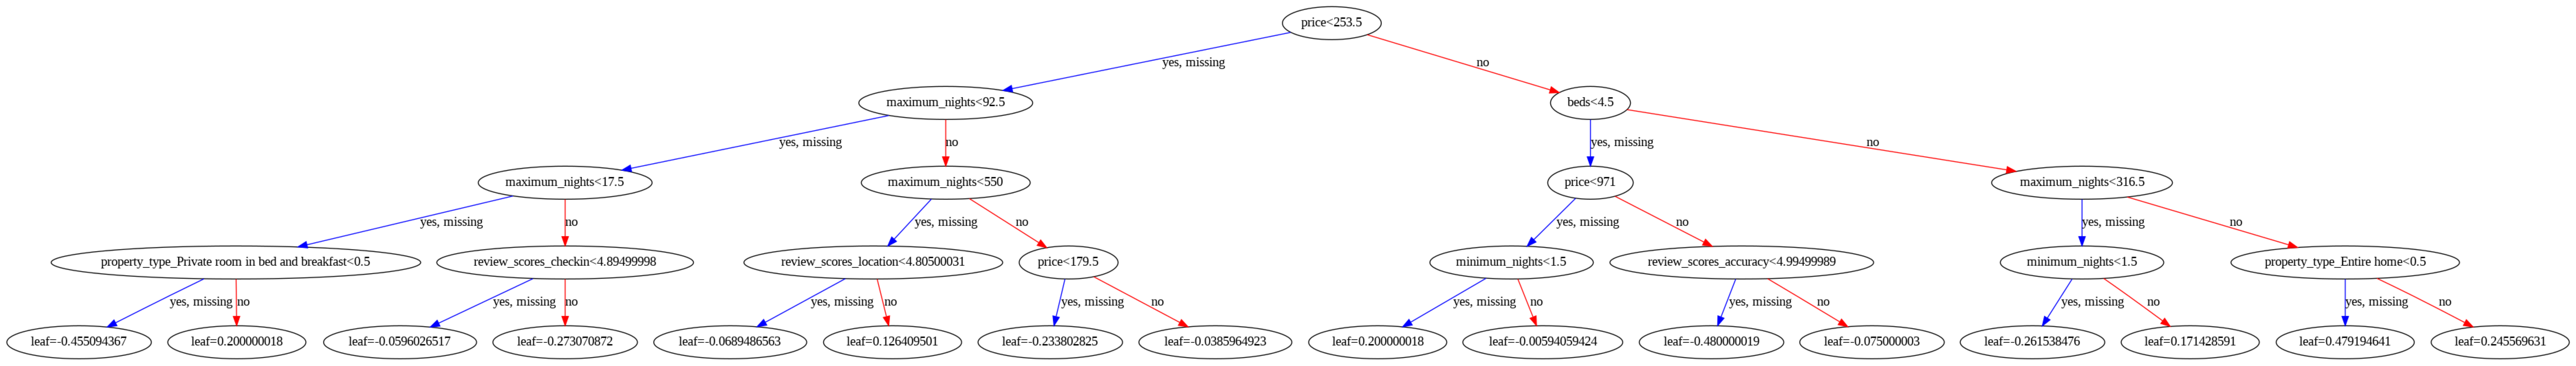

In [43]:
fig, ax = plt.subplots(figsize=(100, 100))
xgb.plot_tree(xgbc, ax=ax)
plt.show()
#Based on results below, leaves 2, 6, 9, 14, 15, and 16 had probabilities greater than 0.5

In [44]:
xgbc_prob1 = 1/(1+np.exp(-1*-0.46))
xgbc_prob1

0.38698582386066455

In [45]:
xgbc_prob2 = 1/(1+np.exp(-1*0.2))
xgbc_prob2

0.549833997312478

In [46]:
xgbc_prob3 = 1/(1+np.exp(-1*-0.06))
xgbc_prob3

0.4850044983805899

In [47]:
xgbc_prob4 = 1/(1+np.exp(-1*-0.27))
xgbc_prob4

0.4329070950345457

In [48]:
xgbc_prob5 = 1/(1+np.exp(-1*-0.07))
xgbc_prob5

0.48250714233361025

In [49]:
xgbc_prob6 = 1/(1+np.exp(-1*0.13))
xgbc_prob6

0.5324543063873187

In [50]:
xgbc_prob7 = 1/(1+np.exp(-1*-0.23))
xgbc_prob7

0.44275214540144436

In [51]:
xgbc_prob8 = 1/(1+np.exp(-1*-0.04))
xgbc_prob8

0.4900013331200346

In [52]:
xgbc_prob9 = 1/(1+np.exp(-1*0.2))
xgbc_prob9

0.549833997312478

In [53]:
xgbc_prob10 = 1/(1+np.exp(-1*-0.01))
xgbc_prob10

0.49750002083312506

In [54]:
xgbc_prob11 = 1/(1+np.exp(-1*-0.48))
xgbc_prob11

0.382252125230751

In [55]:
xgbc_prob12 = 1/(1+np.exp(-1*-0.08))
xgbc_prob12

0.48001065984441826

In [56]:
xgbc_prob13 = 1/(1+np.exp(-1*-0.26))
xgbc_prob13

0.4353637081969708

In [57]:
xgbc_prob14 = 1/(1+np.exp(-1*0.17))
xgbc_prob14

0.542397940774351

In [58]:
xgbc_prob15 = 1/(1+np.exp(-1*0.48))
xgbc_prob15

0.617747874769249

In [59]:
xgbc_prob16 = 1/(1+np.exp(-1*0.25))
xgbc_prob16

0.5621765008857981

Based on results above, leaves 2, 6, 9, 14, 15, and 16 had probabilities greater than 0.5